In [1]:
! code .

## 2コンポーネント

In [1]:
import heatrapy as ht
import pandas as pd
import os

コンポーネント1の特性

In [2]:
material_1 = "Gd"
length_1 = 50

コンポーネント2の特性

In [3]:
material_2 = "Cu"
length_2 = 50

共通事項

In [4]:
init_temperature = 293 #初期温度
output_file_name_header = "2comp_test"

analysis_time = 100000
dt = 0.1

解析モデルの作成

In [5]:
if os.path.exists(output_file_name_header+"_0.txt"):
    os.remove(output_file_name_header+"_0.txt")
if os.path.exists(output_file_name_header+"_1.txt"):
    os.remove(output_file_name_header+"_1.txt")

two_comp = ht.system_objects(number_objects=2, materials=(material_1, material_2),
                 objects_length=(length_1, length_2), amb_temperature=init_temperature, dx=0.01, dt=dt,
                 file_name=output_file_name_header,boundaries=((0,0), (1, 0)), initial_state=False, materials_path=False)

境界条件の設定（断熱以外のオブジェクトを設定する）

In [7]:
two_comp.objects[0].boundaries=(300,0)

In [8]:
for i in range(len(two_comp.objects)):
    print("コンポーネント" + str(i) + " （前端温度、後端温度)=" + str(two_comp.objects[i].boundaries) + "  ※0は断熱条件")

コンポーネント0 （前端温度、後端温度)=(300, 0)  ※0は断熱条件
コンポーネント1 （前端温度、後端温度)=(0, 0)  ※0は断熱条件


熱伝達で入熱

In [8]:
two_comp.set_input_heat_transfer((0,1),700,900)

接触の定義

In [9]:
two_comp.contactAdd(((0,11),(1,1),30000))
two_comp.contacts

{((0, 11), (1, 1), 30000)}

問題を解く

In [10]:
two_comp.compute(timeInterval=analysis_time, write_interval=100, solver='implicit_k(x)')

ポスト処理

In [11]:
df_1 = pd.read_csv(output_file_name_header+"_0.txt",dtype=float).drop(["T[0] (K)"],axis=1)
df_2 = pd.read_csv(output_file_name_header+"_1.txt",dtype=float).drop(["T[0] (K)"],axis=1)

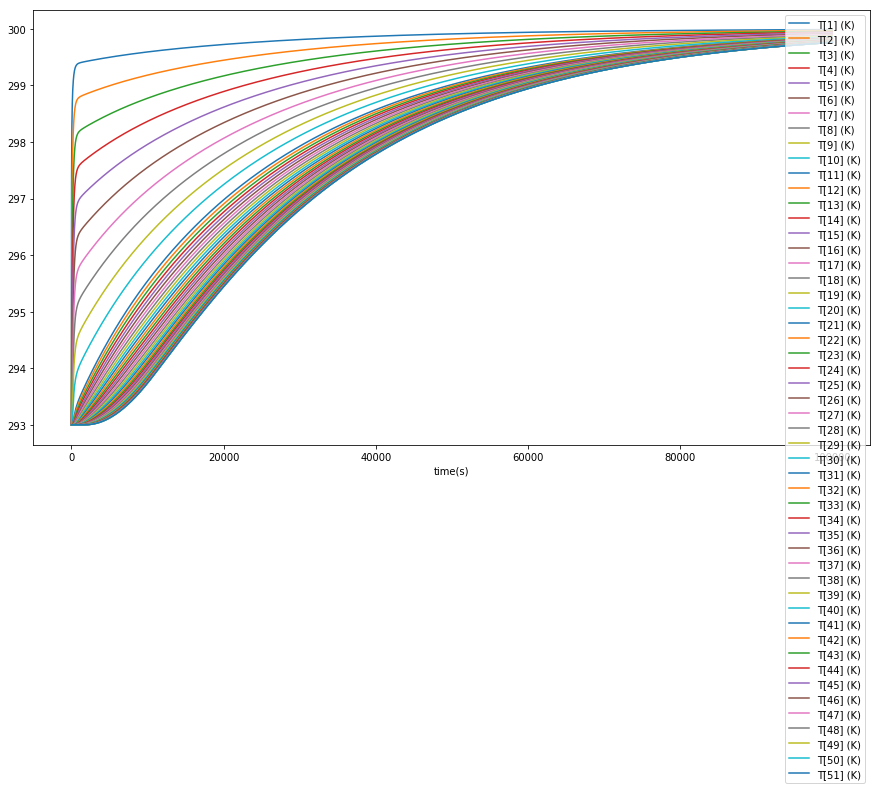

In [13]:
df_1.plot(x="time(s)",figsize=(15,8))

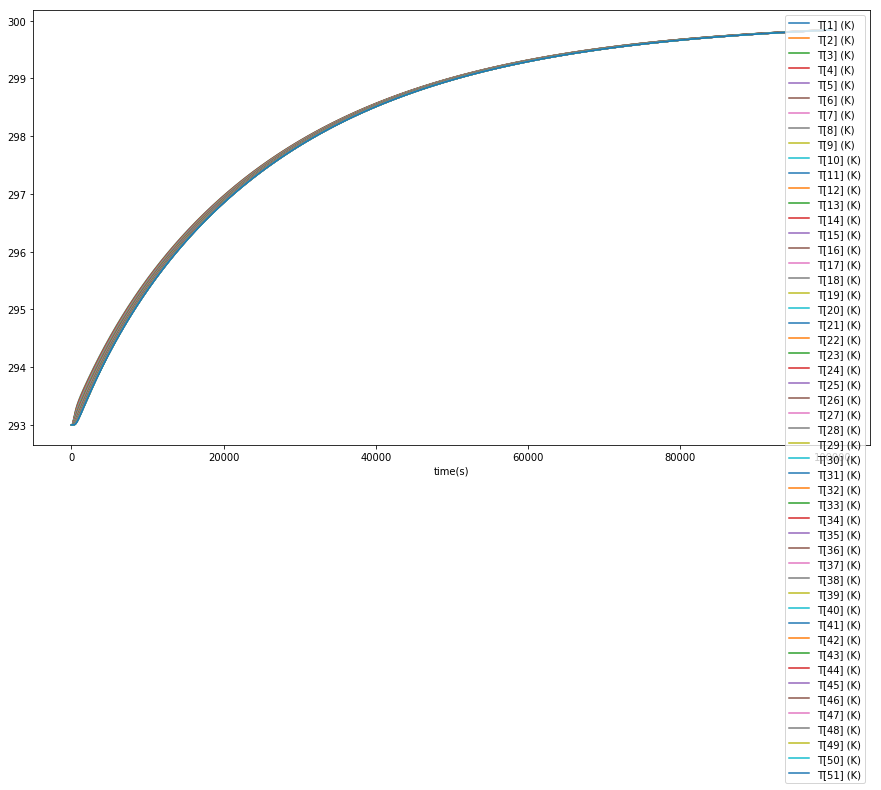

In [14]:
df_2.plot(x="time(s)",figsize=(15,8))

## 3コンポーネント

In [1]:
import heatrapy as ht
import pandas as pd
import os

In [2]:
output_file_name_header = "test_1"

In [3]:
three_comp = ht.system_objects(number_objects=3, materials=('Cu', 'AL','Cu'),
                 objects_length=(10, 10,20), amb_temperature=293, dx=0.001, dt=0.01,
                 file_name=output_file_name_header, initial_state=False,
                 boundaries=((2, 0), (3, 0),(0,0)), materials_path=False)

In [4]:
three_comp.objects[0].boundaries=(500,0)
for i in range(len(three_comp.objects)):
    print("コンポーネント" + str(i) + " （前端温度、後端温度)=" + str(three_comp.objects[i].boundaries) + "  ※0は断熱条件")

コンポーネント0 （前端温度、後端温度)=(500, 0)  ※0は断熱条件
コンポーネント1 （前端温度、後端温度)=(0, 0)  ※0は断熱条件
コンポーネント2 （前端温度、後端温度)=(0, 0)  ※0は断熱条件


In [5]:
three_comp.contacts.add(((0,10),(1,1),3000))

In [6]:
three_comp.contacts.add(((1,10),(2,1),5000))

In [7]:
three_comp.compute(timeInterval=60, write_interval=100, solver='implicit_k(x)')

In [8]:
df_1 = pd.read_csv(output_file_name_header+"_0.txt",dtype=float).drop(["T[0] (K)"],axis=1)
df_2 = pd.read_csv(output_file_name_header+"_1.txt",dtype=float).drop(["T[0] (K)"],axis=1)
df_3 = pd.read_csv(output_file_name_header+"_2.txt",dtype=float).drop(["T[0] (K)"],axis=1)

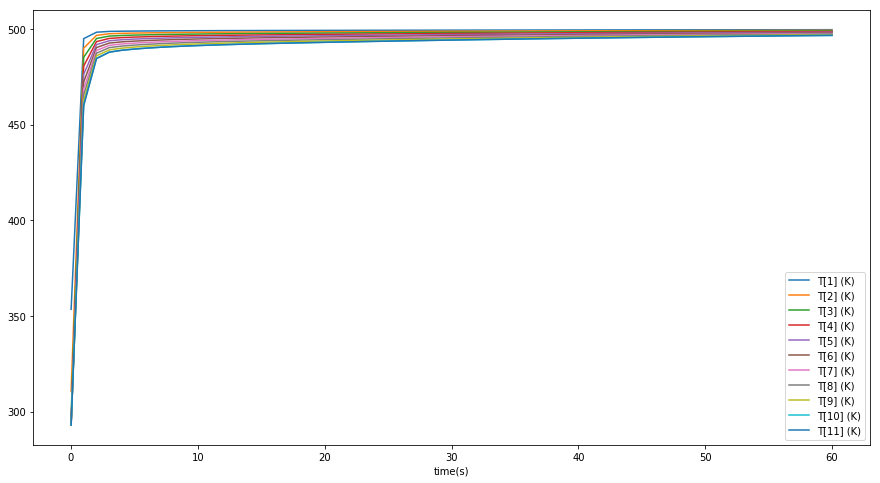

In [10]:
df_1.plot(x="time(s)",figsize=(15,8))

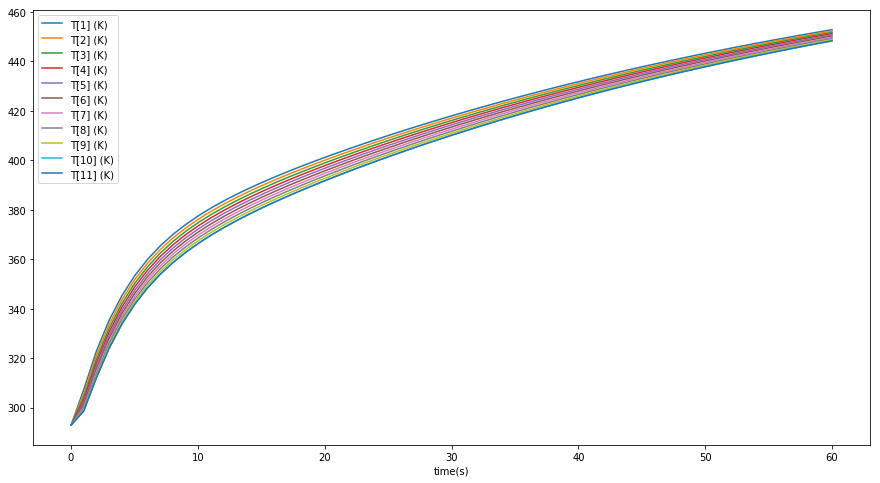

In [11]:
df_2.plot(x="time(s)",figsize=(15,8))

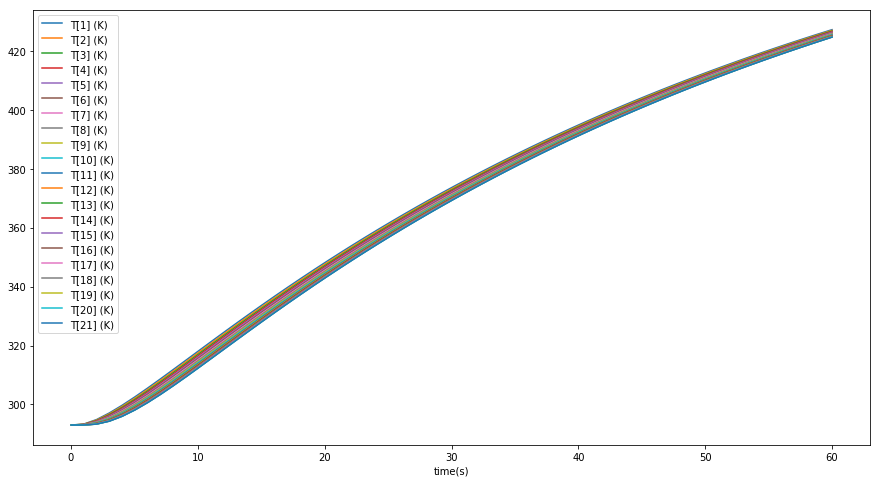

In [12]:
df_3.plot(x="time(s)",figsize=(15,8))